# CNN for Image Classification

In this lab, you are given a dataset containing 6,000 pictures of cats and dogs (3,000 cats, 3,000 dogs) and asked to train a classifier built upon Convolutional Neural Networks (ConvNets) to classify images as "dogs" or "cats".

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# from __future__ import print_function
import keras
from keras import metrics
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.
/usr/local/Cellar/python/3.7.1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


### Exercise 1 
Split the dataset by selecting 4,800 pictures for training, 600 for validation, and 600 for testing.

In [2]:
img_width = 50
img_height = 50
num_classes = 2
DATA_DIR = './data/'
image_filenames = [DATA_DIR+i for i in os.listdir(DATA_DIR)] # use this for full dataset

# Split the data in three sets, 80% for training, 10% for validation and 10% for testing
# make sure that the image filenames have a fixed order before shuffling
# Add your code here

In [3]:
print(image_filenames)

['./data/cat.2718.jpg', './data/dog.1753.jpg', './data/cat.1211.jpg', './data/dog.775.jpg', './data/cat.1577.jpg', './data/cat.952.jpg', './data/dog.1035.jpg', './data/cat.946.jpg', './data/dog.1021.jpg', './data/cat.1563.jpg', './data/dog.2528.jpg', './data/dog.761.jpg', './data/cat.1205.jpg', './data/dog.1747.jpg', './data/dog.991.jpg', './data/dog.2266.jpg', './data/dog.749.jpg', './data/cat.2724.jpg', './data/dog.1009.jpg', './data/cat.2042.jpg', './data/dog.2500.jpg', './data/dog.2514.jpg', './data/cat.2056.jpg', './data/cat.2730.jpg', './data/dog.985.jpg', './data/dog.2272.jpg', './data/cat.1239.jpg', './data/cat.6.jpg', './data/dog.2299.jpg', './data/dog.1790.jpg', './data/cat.2903.jpg', './data/dog.1948.jpg', './data/cat.749.jpg', './data/cat.991.jpg', './data/cat.985.jpg', './data/dog.1784.jpg', './data/cat.2917.jpg', './data/dog.1974.jpg', './data/dog.952.jpg', './data/cat.1588.jpg', './data/cat.2081.jpg', './data/cat.775.jpg', './data/cat.761.jpg', './data/cat.2095.jpg', './

In [4]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

The function ```get_class_from_filename``` takes the file path and returns ***0*** for cats and ***1*** for dogs.

The function ```generate_class_arr``` takes the array of filenames and returns an array of class numbers using the function ```get_class_from_filename```.

In [5]:

def load_images(filenames):
    
    files = []
    for i in range(len(filenames)):
        files.append(cv2.imread(filenames[i]))
        
    return files

def get_class_from_filename(filename):
    
    parts = filename.split(".")
    size = len(parts)
    
    _class = parts[size - 3]
    _class = _class[-3:]
    
    return 0 if _class == "cat" else 1


# print(get_class_from_filename("./test/dog.267.jpg"))

def generate_class_arr(filenames):
    
    classes = []
    
    for i in range(len(filenames)):
        classes.append(get_class_from_filename(filenames[i]))
    
    return classes


# arr = ['./data/cat.2718.jpg', './data/dog.1753.jpg', './data/cat.1211.jpg', './data/dog.775.jpg', './data/cat.1577.jpg', './data/cat.952.jpg']
# print(generate_class_arr(arr))
        


In [6]:
y = generate_class_arr(image_filenames)

In [7]:

x_train_filenames, x_test_filenames, y_train, y_test = train_test_split(image_filenames, y, test_size=0.2)
x_test_filenames, x_val_filenames, y_test, y_val = train_test_split(x_test_filenames, y_test, test_size=0.5)


In [8]:
x_train = load_images(x_train_filenames)
x_test = load_images(x_test_filenames)
x_val = load_images(x_val_filenames)


In [9]:
# print(x_train_filenames[:5])
# print(y_train[:5])
print(len(x_train_filenames), " ", len(y_train))
print("\n")

# print(x_test_filenames[:5])
# print(y_test[:5])
print(len(x_test_filenames), " ", len(y_test))
print("\n")

# print(x_val_filenames[:5])
# print(y_val[:5])
print(len(x_val_filenames), " ", len(y_val))


4800   4800


600   600


600   600


Label: 1
(375, 499, 3)


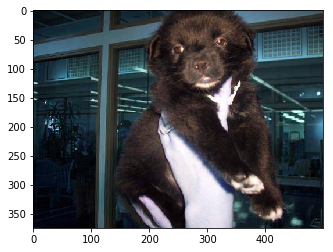

In [10]:

plt.imshow(x_train[0])
print("Label: {}".format(y_train[0]))
print(x_train[0].shape)


Label: 0


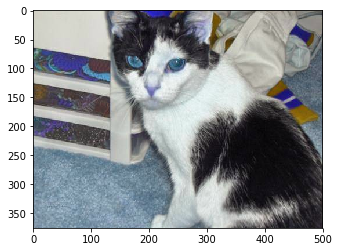

In [11]:

plt.imshow(x_test[0])
print("Label: {}".format(y_test[0]))


Label: 1


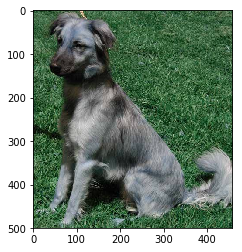

In [12]:

plt.imshow(x_val[0])
print("Label: {}".format(y_val[0]))


### Exercise 2
Train a Convolutional Neural Network (ConvNet) on the training set. The general structure of the ConvNet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers. A Conv2D layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. A MaxPooling2D layer is used to downscale input in both the vertical and horizontal dimensions.

In [32]:
# Add your code here

input_shape = x_train[0].shape

model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
          

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 373, 497, 64)      1792      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 371, 495, 32)      18464     
_________________________________________________________________
flatten_4 (Flatten)          (None, 5876640)           0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               587664100 
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 587,684,457
Trainable params: 587,684,457
Non-trainable params: 0
_________________________________________________________________


In [34]:
batch_size = 64

In [35]:
epochs = 10

In [36]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [37]:
 
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 4800 arrays: [array([[[14, 23, 27],
        [14, 23, 27],
        [14, 23, 27],
        ...,
        [61, 84, 99],
        [61, 84, 99],
        [59, 82, 97]],

       [[13, 22, 26],
        [13, 22, 26],
        ...

### Exercise 3

Output the training/validation loss and accuracy curves. Also print the classification results (e.g., classification accuracy, confusion matrix, precision-recall curves and/or ROC curves) on the test set.

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve

# Add your code here

### Exercise 4

Explore different network architectures (e.g., stacking 4 Conv2D+MaxPooling2D layers) and various ways in tuning the model parameters to see if you can improve the model performance on the validation set.

In [15]:
# Add your code here

### Exercise 5

Apply the trained model on the testing set and output the classification results.

In [16]:
# Add your code here

### Exercise 6 

Plot the saliency map of original image to see which part is important for making classification decisions. You can refer to the following blog article on how to generate visualisation results of the filters in the ConvNets.
https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

In [17]:
# Add your code here